In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading in the data

In [2]:
data = pd.read_csv("../data/financials/financials_status_forms_clean2.csv")

## Just some stats about the dataset

In [3]:
data.shape

(478033, 48)

In [4]:
# checking the datatypes and nulls
 # looks like most of the valuable columns have enough data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   company                   478033 non-null  object 
 1   id                        478033 non-null  int64  
 2   date                      478033 non-null  object 
 3   net_sales                 474999 non-null  float64
 4   other_sales               194756 non-null  float64
 5   op_profit_ebit            474998 non-null  float64
 6   prof_after_net_fin_items  474998 non-null  float64
 7   results                   474998 non-null  float64
 8   sub_unpaid_cap            475048 non-null  float64
 9   fixed_assets              475047 non-null  float64
 10  current_assets            475031 non-null  float64
 11  assets                    474923 non-null  float64
 12  equity                    475034 non-null  float64
 13  untaxed_reserves          475049 non-null  f

In [5]:
# how many companies are there
data['id'].nunique()

68993

In [6]:
# how many companies went bankrupt
data[data['default']==1]['id'].nunique()

1805

# Trends overtime
### Number of companies

Text(0, 0.5, 'Number of companies')

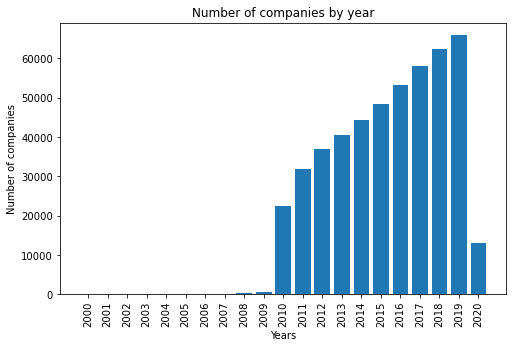

In [7]:
companies_by_year = data.groupby(by=['year']).count()['id']

plt.figure(figsize=(8,5))
plt.bar(companies_by_year.index,companies_by_year.values)
plt.xticks(ticks = companies_by_year.index,rotation=90)
plt.title("Number of companies by year")
plt.xlabel("Years")
plt.ylabel("Number of companies")

### Defaults

In [8]:
default_by_year = data.groupby(by=['year']).sum()['default']
default_by_year_norm = data.groupby(by=['year']).mean()['default']

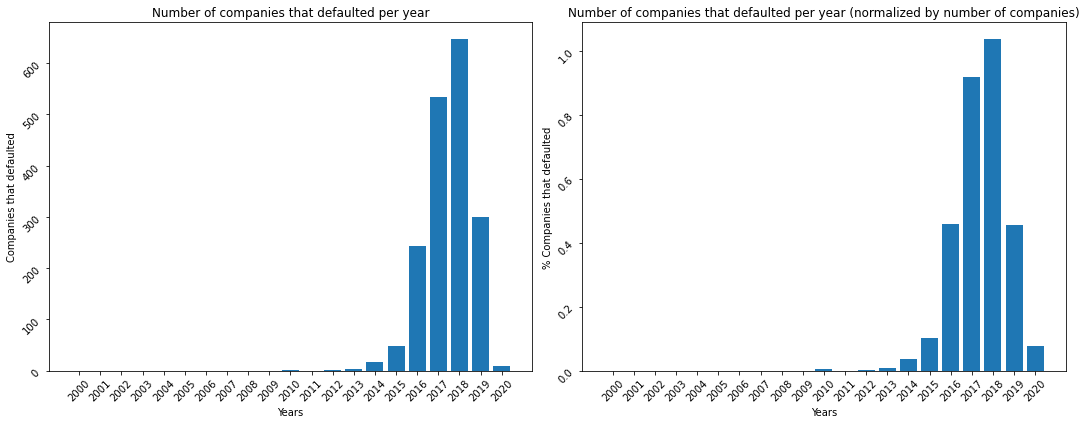

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax[0].bar(default_by_year.index,default_by_year.values)
ax[0].set_xticks(ticks = default_by_year.index)
ax[0].set_title("Number of companies that defaulted per year")
ax[0].set_xlabel("Years")
ax[0].set_ylabel("Companies that defaulted")
ax[0].tick_params(rotation=45)
ax[1].bar(default_by_year_norm.index,default_by_year_norm.values*100)
ax[1].set_xticks(ticks = default_by_year_norm.index)
ax[1].set_title("Number of companies that defaulted per year (normalized by number of companies)")
ax[1].set_xlabel("Years")
ax[1].set_ylabel("% Companies that defaulted")
ax[1].tick_params(rotation=45)
plt.tight_layout()

### Revenue, Net sales

In [10]:
op_prof_ebitda_per_year = data.groupby(by=['year']).mean()['op_prof_ebitda']
rev_by_year = data.groupby(by=['year']).mean()['revenue']

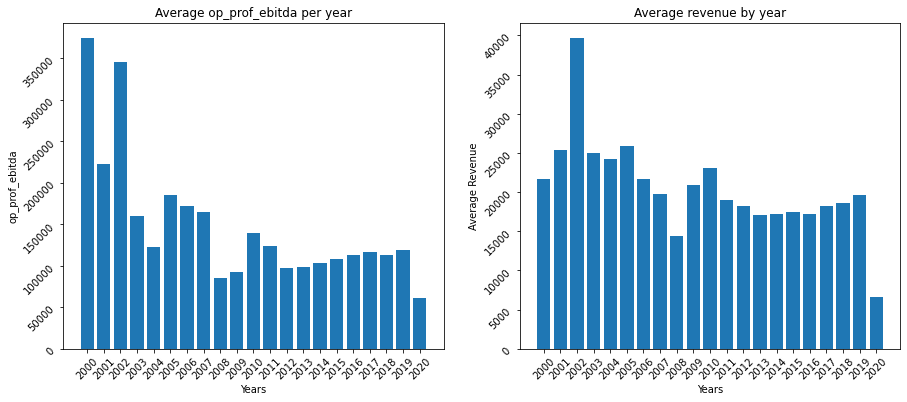

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
ax[0].bar(op_prof_ebitda_per_year.index,op_prof_ebitda_per_year.values*100)
ax[0].set_xticks(ticks = op_prof_ebitda_per_year.index)
ax[0].set_title("Average op_prof_ebitda per year")
ax[0].set_xlabel("Years")
ax[0].set_ylabel("op_prof_ebitda")
ax[0].tick_params(rotation=45)
ax[1].bar(rev_by_year.index,rev_by_year.values)
ax[1].set_xticks(ticks = rev_by_year.index)
ax[1].set_title("Average revenue by year")
ax[1].set_xlabel("Years")
ax[1].set_ylabel("Average Revenue")
ax[1].tick_params(rotation=45)

### Net Sales (sanity check above)

In [12]:
net_sales_by_year = data.groupby(by=['year']).mean()['net_sales']

Text(0, 0.5, 'Average net sales')

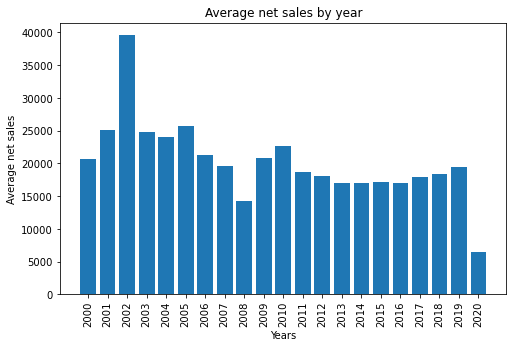

In [13]:
plt.figure(figsize=(8,5))
plt.bar(net_sales_by_year.index,net_sales_by_year.values)
plt.xticks(ticks = net_sales_by_year.index,rotation=90)
plt.title("Average net sales by year")
plt.xlabel("Years")
plt.ylabel("Average net sales")

### Solidity ratio, quick ratio, assets, equity
Lots of companies have defaulted in 2017, 2018 and 2019. Looking at the revenue and net sales plots this is not obvious so maybe they had low solidity ratios.

In [14]:
solidity_per_year = data.groupby(by=['year']).mean()['solidity']
quick_ratio_per_year = data.groupby(by=['year']).mean()['quick_ratio']
assets_per_year = data.groupby(by=['year']).mean()['assets']
equity_per_year = data.groupby(by=['year']).mean()['equity']

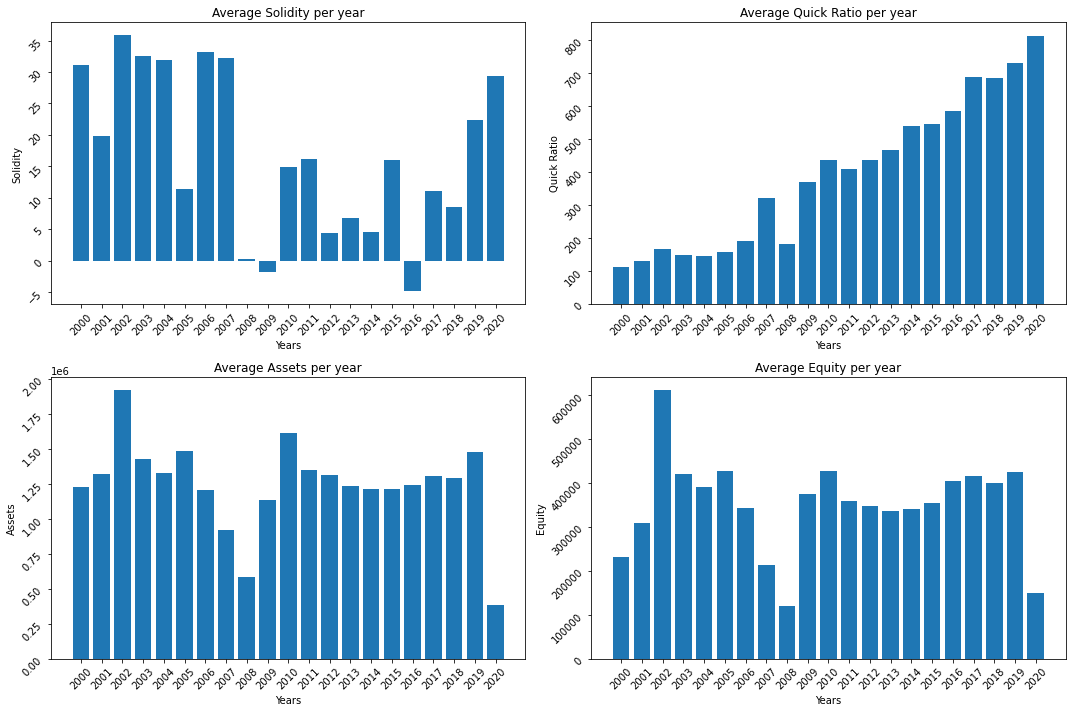

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15, 10))
# solidity
ax[0,0].bar(solidity_per_year.index,solidity_per_year.values*100)
ax[0,0].set_xticks(ticks = solidity_per_year.index)
ax[0,0].set_title("Average Solidity per year")
ax[0,0].set_xlabel("Years")
ax[0,0].set_ylabel("Solidity")
ax[0,0].tick_params(rotation=45)
# quick
ax[0,1].bar(quick_ratio_per_year.index,quick_ratio_per_year.values*100)
ax[0,1].set_xticks(ticks = quick_ratio_per_year.index)
ax[0,1].set_title("Average Quick Ratio per year")
ax[0,1].set_xlabel("Years")
ax[0,1].set_ylabel("Quick Ratio")
ax[0,1].tick_params(rotation=45)
# assets
ax[1,0].bar(assets_per_year.index,assets_per_year.values*100)
ax[1,0].set_xticks(ticks = assets_per_year.index)
ax[1,0].set_title("Average Assets per year")
ax[1,0].set_xlabel("Years")
ax[1,0].set_ylabel("Assets")
ax[1,0].tick_params(rotation=45)
# equity
ax[1,1].bar(equity_per_year.index,equity_per_year.values*100)
ax[1,1].set_xticks(ticks = equity_per_year.index)
ax[1,1].set_title("Average Equity per year")
ax[1,1].set_xlabel("Years")
ax[1,1].set_ylabel("Equity")
ax[1,1].tick_params(rotation=45)
plt.tight_layout()

Looks like a better predictor of bankrupcy. 2016, 2017 and 2018 all have low mean solidity scores. There are earlier years with these low scores but due to the data being biased to more recent bankrupcy there arent many companies that went bankrupt then. This with the year will be good at predicting bankrupcy. This score consists of assets and equity so it will be worthwhile to look at those two components.

Quick ratio (higher is better). Seems like an inverse corrolation overtime which does not sound right.

### Liabilities

In [16]:
lt_liabilities_per_year = data.groupby(by=['year']).mean()['lt_liabilities']
curr_liabilities_per_year = data.groupby(by=['year']).mean()['curr_liabilities']

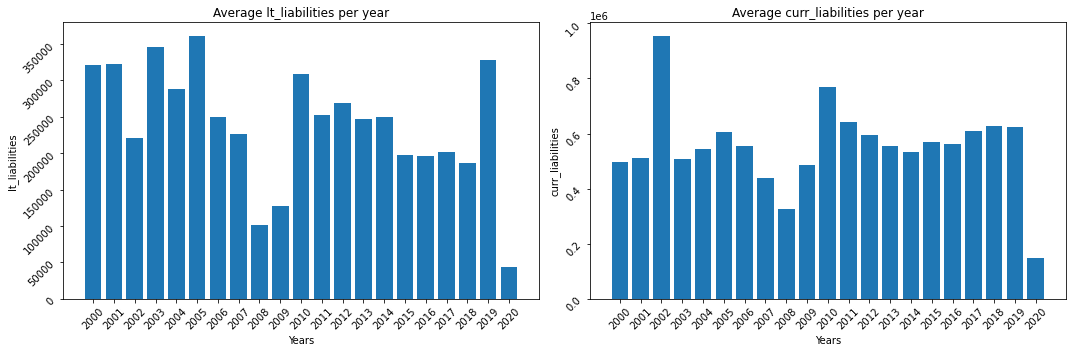

In [17]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# limited liabilities
ax[0].bar(lt_liabilities_per_year.index,lt_liabilities_per_year.values*100)
ax[0].set_xticks(ticks = lt_liabilities_per_year.index)
ax[0].set_title("Average lt_liabilities per year")
ax[0].set_xlabel("Years")
ax[0].set_ylabel("lt_liabilities")
ax[0].tick_params(rotation=45)
# current liabilities
ax[1].bar(curr_liabilities_per_year.index,curr_liabilities_per_year.values*100)
ax[1].set_xticks(ticks = curr_liabilities_per_year.index)
ax[1].set_title("Average curr_liabilities per year")
ax[1].set_xlabel("Years")
ax[1].set_ylabel("curr_liabilities")
ax[1].tick_params(rotation=45)
plt.tight_layout()

# Difference between defaulters and non-defaulters over time
In each of the years there are many more companies that did not go bankrupt. This will shift the averages in their favor. Here I will look at these values but I will differentiate between defaulters and non-defaulters to see the differences.

### Revenue, solidity, operating profit, num employees, results

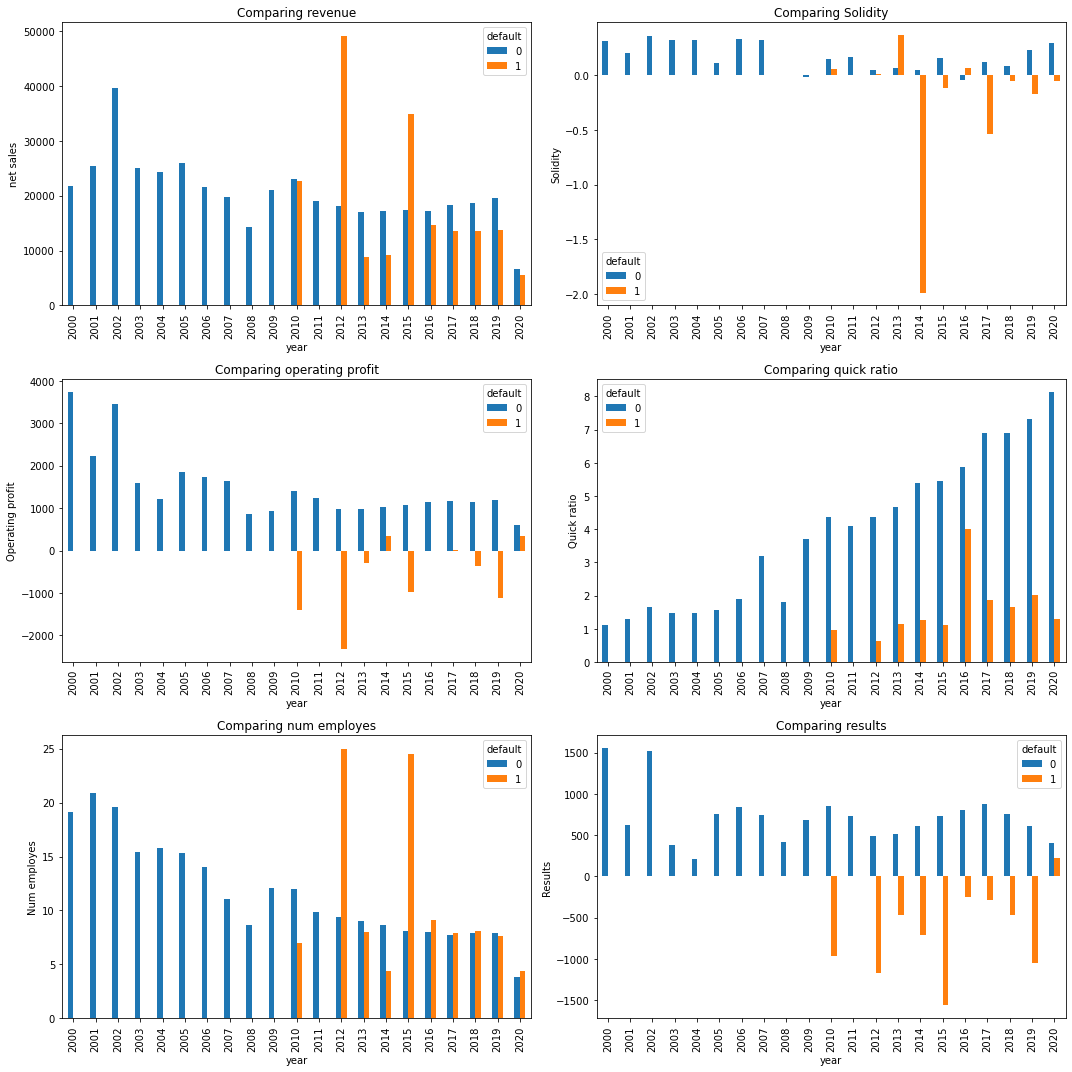

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2)
data.groupby(by=['year','default']).mean()['revenue'].unstack().plot(kind='bar',
                                                                     title="Comparing revenue",
                                                                     ylabel='revenue',
                                                                    figsize=(15,15),
                                                                    ax = axes[0,0])
data.groupby(by=['year','default']).mean()['solidity'].unstack().plot(kind='bar',
                                                                     title="Comparing Solidity",
                                                                     ylabel='Solidity',
                                                                    figsize=(15,15),
                                                                     ax = axes[0,1])
data.groupby(by=['year','default']).mean()['op_prof_ebitda'].unstack().plot(kind='bar',
                                                                     title="Comparing operating profit",
                                                                     ylabel='Operating profit',
                                                                    figsize=(15,15),
                                                                           ax=axes[1,0])
data.groupby(by=['year','default']).mean()['quick_ratio'].unstack().plot(kind='bar',
                                                                     title="Comparing quick ratio",
                                                                     ylabel='Quick ratio',
                                                                    figsize=(15,15),
                                                                        ax=axes[1,1])
data.groupby(by=['year','default']).mean()['num_employes'].unstack().plot(kind='bar',
                                                                     title="Comparing num employes",
                                                                     ylabel='Num employes',
                                                                    figsize=(15,15),
                                                                         ax=axes[2,0])
data.groupby(by=['year','default']).mean()['results'].unstack().plot(kind='bar',
                                                                     title="Comparing results",
                                                                     ylabel='Results',
                                                                    figsize=(15,15),
                                                                    ax=axes[2,1])
plt.tight_layout()

### Du pont

<AxesSubplot:title={'center':'Comparing Du Pont'}, xlabel='year', ylabel='Du pont'>

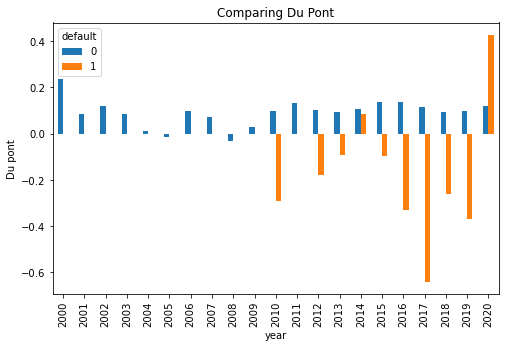

In [19]:
data.groupby(by=['year','default']).mean()['du_pont_model'].unstack().plot(kind='bar',
                                                                     title="Comparing Du Pont",
                                                                     ylabel='Du pont',
                                                                    figsize=(8,5))

# Feature importance using a Random Forrest

## Getting the features and target variables

In [20]:
# getting the columns that will be used
# only use the numeric features
# 3-36 + 42 this includes the default column
# removing columns with lots on NaNs
column_indices = [1,3]
column_indices = column_indices + list(np.arange(5,18))
column_indices = column_indices + list(np.arange(23,25))
column_indices = column_indices + [28]
column_indices = column_indices + list(np.arange(30,37))
column_indices = column_indices + [42]
features_and_target = data.iloc[:,column_indices]

In [21]:
features_and_target.head()

id  net_sales  op_profit_ebit  prof_after_net_fin_items  results  \
0  5590655865        0.0           -44.0                     -44.0    -44.0   
1  5590655865        0.0           -72.0                     -72.0    -72.0   
2  5590655865       28.0          -279.0                    -279.0   -279.0   
3  5590655865        0.0          -226.0                     749.0    749.0   
4  5564709904        0.0           -62.0                    7938.0   7938.0   

   sub_unpaid_cap  fixed_assets  current_assets   assets   equity  ...  \
0             0.0          99.0            55.0    153.0    105.0  ...   
1             0.0         130.0            67.0    197.0    148.0  ...   
2             0.0         160.0           409.0    570.0    520.0  ...   
3             0.0         801.0            47.0    848.0    799.0  ...   
4             0.0        8649.0         19537.0  28186.0  20940.0  ...   

   revenue  op_prof_ebitda  du_pont_model  prof_margin  gross_prof  \
0      0.0           -13.0            NaN          NaN         NaN   
1      0.0           -41.0            NaN          NaN         NaN   
2     28.0          -248.0        -0.4895      -9.9643         1.0   
3      0.0          -169.0            NaN          NaN         NaN   
4      0.0           -62.0            NaN          NaN         NaN   

   working_cap  solidity  quick_ratio  default  year  
0          NaN    0.6863       0.5714        0  2019  
1          NaN    0.7513       0.8163        0  2018  
2      12.8214    0.9123       7.6400        0  2017  
3          NaN    0.9422       0.4082        0  2016  
4          NaN    0.7429       2.6962        0  2019  

[5 rows x 26 columns]

In [22]:
features_and_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        478033 non-null  int64  
 1   net_sales                 474999 non-null  float64
 2   op_profit_ebit            474998 non-null  float64
 3   prof_after_net_fin_items  474998 non-null  float64
 4   results                   474998 non-null  float64
 5   sub_unpaid_cap            475048 non-null  float64
 6   fixed_assets              475047 non-null  float64
 7   current_assets            475031 non-null  float64
 8   assets                    474923 non-null  float64
 9   equity                    475034 non-null  float64
 10  untaxed_reserves          475049 non-null  float64
 11  provisions                475051 non-null  float64
 12  lt_liabilities            475050 non-null  float64
 13  curr_liabilities          475037 non-null  f

In [23]:
# removing NaNs
features_and_target.dropna(inplace=True)

<ipython-input-23-bf4e3d2a4ff3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_and_target.dropna(inplace=True)


In [24]:
features_and_target.shape

(439836, 26)

In [25]:
features_and_target['id'].nunique()

67230

In [26]:
features_and_target[features_and_target['default']==1]['id'].nunique()

1664

In [27]:
# droping the id column
features_and_target.drop('id',axis=1,inplace=True)

/home/matt/anaconda3/envs/scrapy/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
# get the non-defaulters
non_default = features_and_target[features_and_target['default']!=1]

In [29]:
# train test split on defaulters
default = features_and_target[features_and_target['default']==1]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# X and y for non-defaulters
X_non_default = non_default.drop('default',axis = 1)
y_non_default = non_default['default']

In [32]:
# train, test split on the non-defaulters
X_train_non_default, X_test_non_default, y_train_non_default, y_test_non_default = train_test_split(X_non_default, y_non_default, test_size=0.3, random_state=42)

In [33]:
# creating the X and y for defaulters
X_default = default.drop('default',axis = 1)
y_default = default['default']

In [34]:
# create the train and test sets
X_train_default, X_test_default, y_train_default, y_test_default = train_test_split(X_default, y_default, test_size=0.3, random_state=42)

In [35]:
# create the X_train y_train, X_test and y_test to input to the model
X_train = X_train_non_default.append(X_train_default, ignore_index=True)
y_train = y_train_non_default.append(y_train_default,ignore_index=True)
X_test = X_test_non_default.append(X_test_default, ignore_index=True)
y_test = y_test_non_default.append(y_test_default, ignore_index=True)

## Fit the model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
# using default for now
rf = RandomForestClassifier()#class_weight={0:1,1:1000000})

In [106]:
rf.fit(X=X_train,y=y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1000000})

## Eval on test set (not great practice but fine for feature selection)

In [107]:
pred = rf.predict(X_test)

In [108]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9961955862737966


In [109]:
# tp/(tp + fp)
# No false positives, never predicted bankrupt if non-bankrupt
print("Precision:",metrics.precision_score(y_test, pred))

Precision: 0.25


In [110]:
# tp/(tp + fn)
# Large false negative, almost always predicted non-bankrupt when they were
print("Recall:",metrics.recall_score(y_test, pred))

Recall: 0.002


In [111]:
print("AUC:",metrics.auc(y_test, pred))

AUC: 0.0


In [112]:
print("F1:",metrics.f1_score(y_test, pred))

F1: 0.003968253968253968


In [113]:
# Predicted on X and true on Y
print("Confusion matrix:",metrics.confusion_matrix(y_test, pred))

Confusion matrix: [[131449      3]
 [   499      1]]


In [55]:
# Large false negative rate, the model basically learned nothing

## Collect feature importance

In [56]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


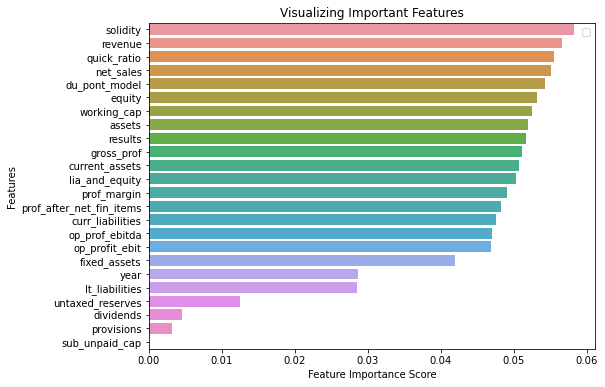

In [57]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,6))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Looking at the variables that reduced the gini error the most (not already done)

### net_sales, equity, working cap, profit margin

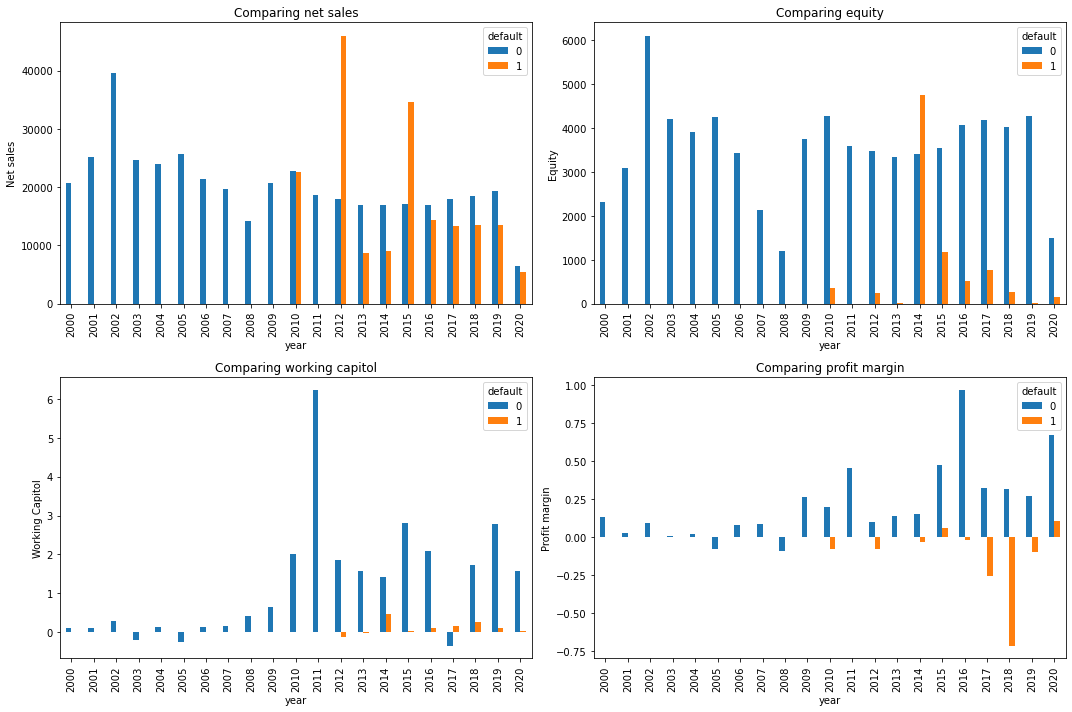

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2)
data.groupby(by=['year','default']).mean()['net_sales'].unstack().plot(kind='bar',
                                                                     title="Comparing net sales",
                                                                     ylabel='Net sales',
                                                                    figsize=(15,10),
                                                                       ax=axes[0,0])
data.groupby(by=['year','default']).mean()['equity'].unstack().plot(kind='bar',
                                                                     title="Comparing equity",
                                                                     ylabel='Equity',
                                                                    figsize=(15,10),
                                                                    ax = axes[0,1])
data.groupby(by=['year','default']).mean()['working_cap'].unstack().plot(kind='bar',
                                                                     title="Comparing working capitol",
                                                                     ylabel='Working Capitol',
                                                                    figsize=(15,10),
                                                                        ax = axes[1,0])
data.groupby(by=['year','default']).mean()['prof_margin'].unstack().plot(kind='bar',
                                                                     title="Comparing profit margin",
                                                                     ylabel='Profit margin',
                                                                    figsize=(15,10),
                                                                        ax=axes[1,1])
plt.tight_layout()

### Assets, liabilities and equity, current assets, gross profit

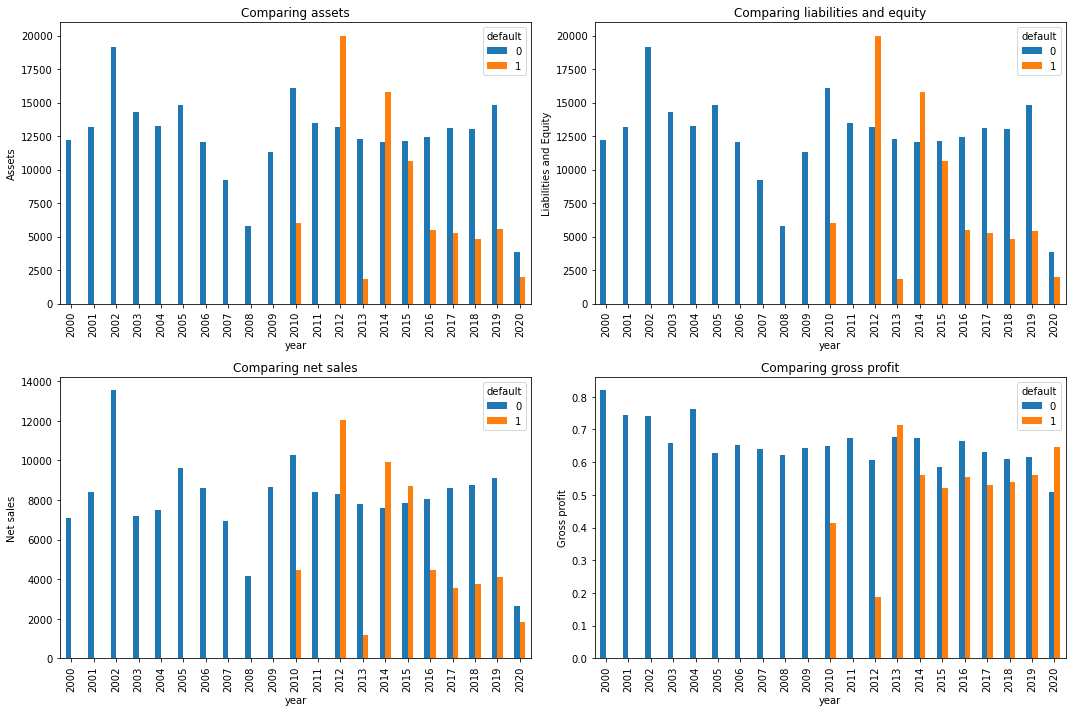

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2)
data.groupby(by=['year','default']).mean()['assets'].unstack().plot(kind='bar',
                                                                     title="Comparing assets",
                                                                     ylabel='Assets',
                                                                    figsize=(15,10),
                                                                   ax=axes[0,0])
data.groupby(by=['year','default']).mean()['lia_and_equity'].unstack().plot(kind='bar',
                                                                     title="Comparing liabilities and equity",
                                                                     ylabel='Liabilities and Equity',
                                                                    figsize=(15,10),
                                                                           ax=axes[0,1])
data.groupby(by=['year','default']).mean()['current_assets'].unstack().plot(kind='bar',
                                                                     title="Comparing net sales",
                                                                     ylabel='Net sales',
                                                                    figsize=(15,10),
                                                                           ax=axes[1,0])
data.groupby(by=['year','default']).mean()['gross_prof'].unstack().plot(kind='bar',
                                                                     title="Comparing gross profit",
                                                                     ylabel='Gross profit',
                                                                    figsize=(15,10),
                                                                       ax=axes[1,1])
plt.tight_layout()